Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

 Loading images.
 Loading 9 images:
   1.  Wall2_4.jpg (960x1280)
   2.  Wall2_5.jpg (960x1280)
   3.  Wall2_6.jpg (960x1280)
   4.  Wall2_7.jpg (960x1280)
   5.  Wall2_8.jpg (960x1280)
   6.  Wall2_9.jpg (960x1280)
   7.  Wall2_10.jpg (960x1280)
   8.  Wall2_11.jpg (960x1280)
   9.  Wall2_12.jpg (960x1280)

 Successfully loaded: 9/9 images
 Loaded 9 images successfully


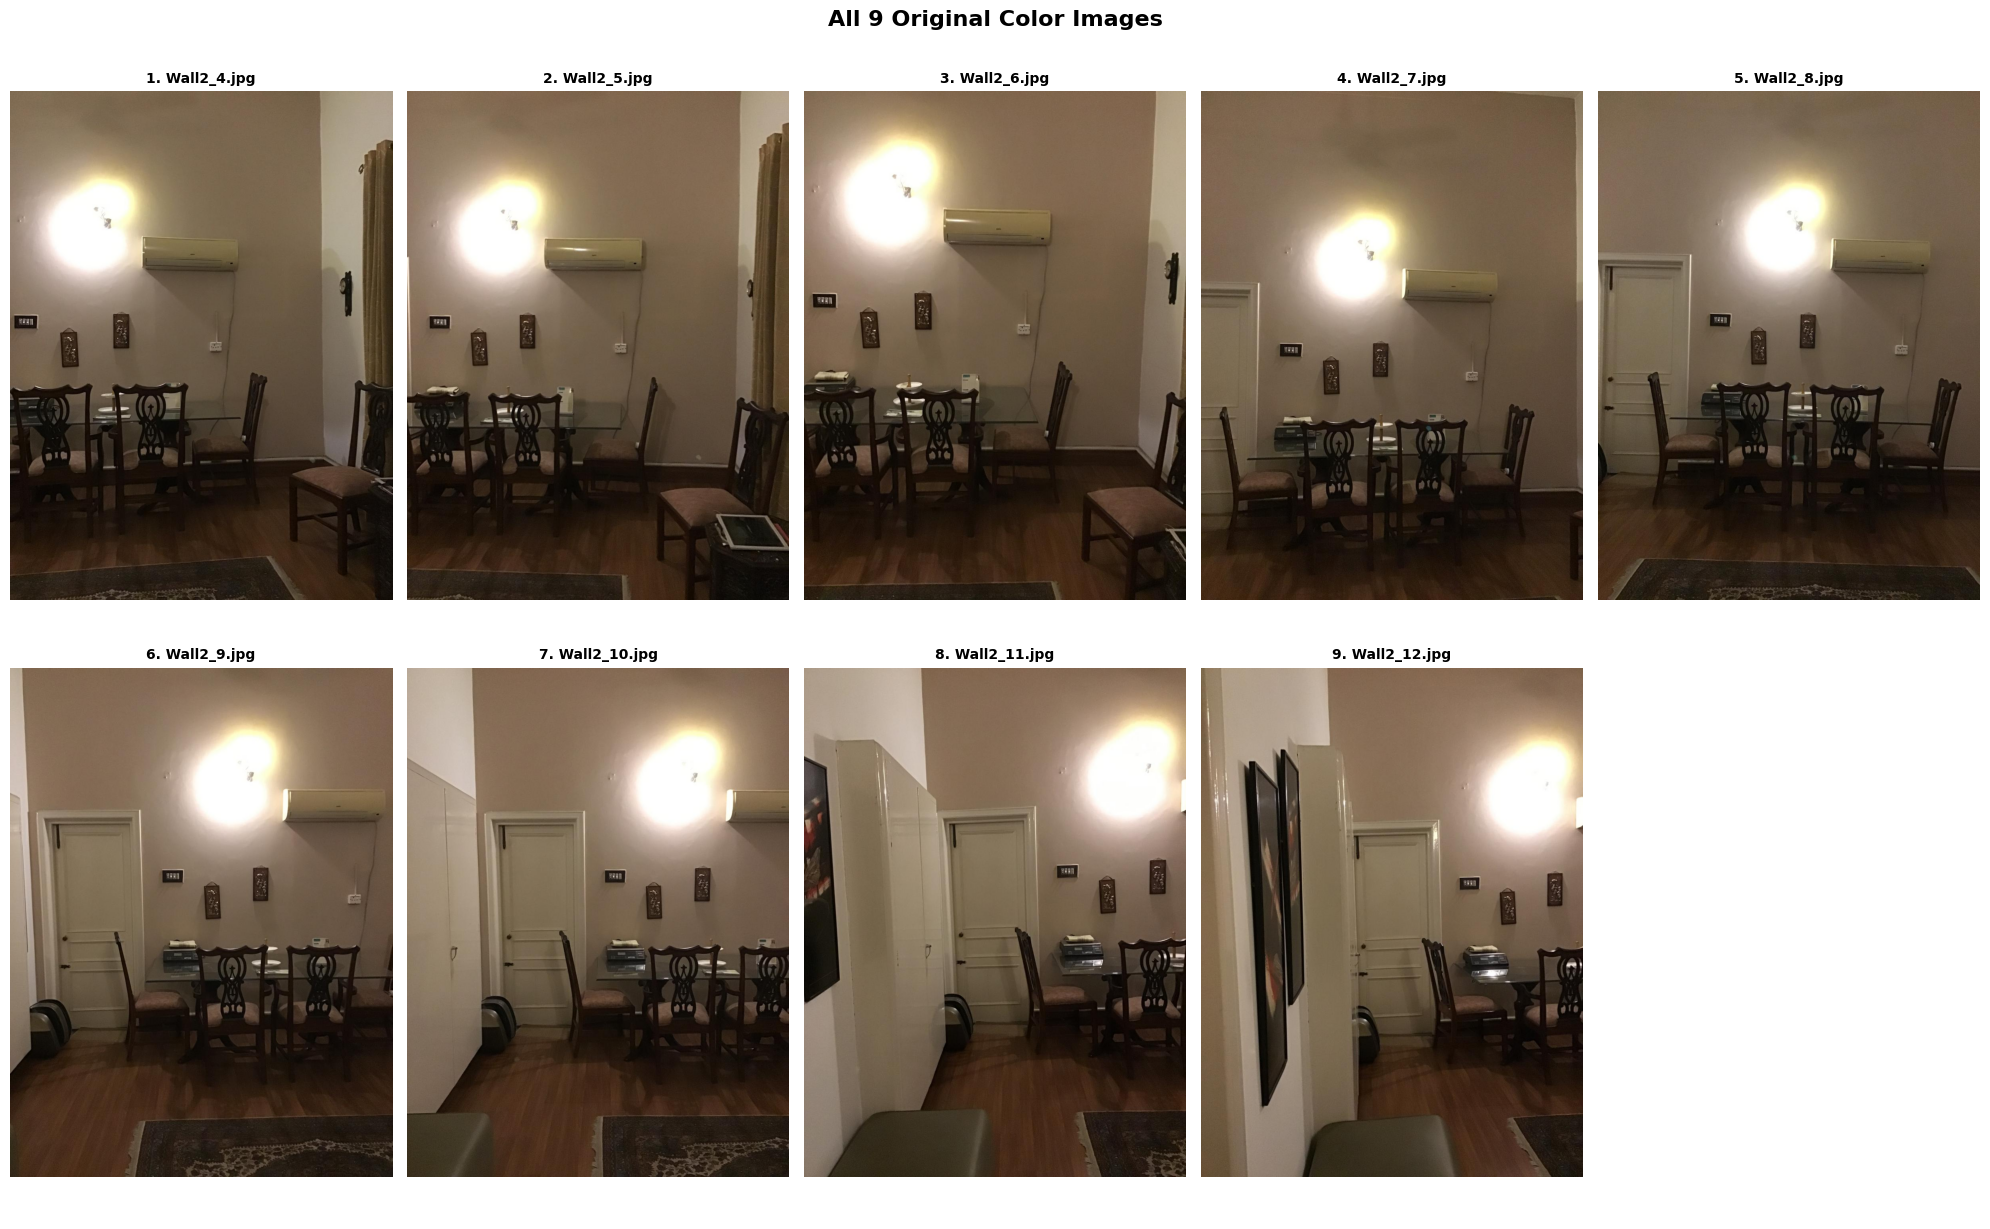

FEATURE MAPPING BETWEEN CONSECUTIVE IMAGE PAIRS
 Showing first 5 pairs (out of 8 total)

Mapping Wall2_4.jpg ↔ Wall2_5.jpg:
  Wall2_4.jpg: 2000 keypoints
  Wall2_5.jpg: 2000 keypoints

Mapping Wall2_5.jpg ↔ Wall2_6.jpg:
  Wall2_5.jpg: 2000 keypoints
  Wall2_6.jpg: 2000 keypoints

Mapping Wall2_6.jpg ↔ Wall2_7.jpg:
  Wall2_6.jpg: 2000 keypoints
  Wall2_7.jpg: 2000 keypoints

Mapping Wall2_7.jpg ↔ Wall2_8.jpg:
  Wall2_7.jpg: 2000 keypoints
  Wall2_8.jpg: 2000 keypoints

Mapping Wall2_8.jpg ↔ Wall2_9.jpg:
  Wall2_8.jpg: 2000 keypoints
  Wall2_9.jpg: 2000 keypoints


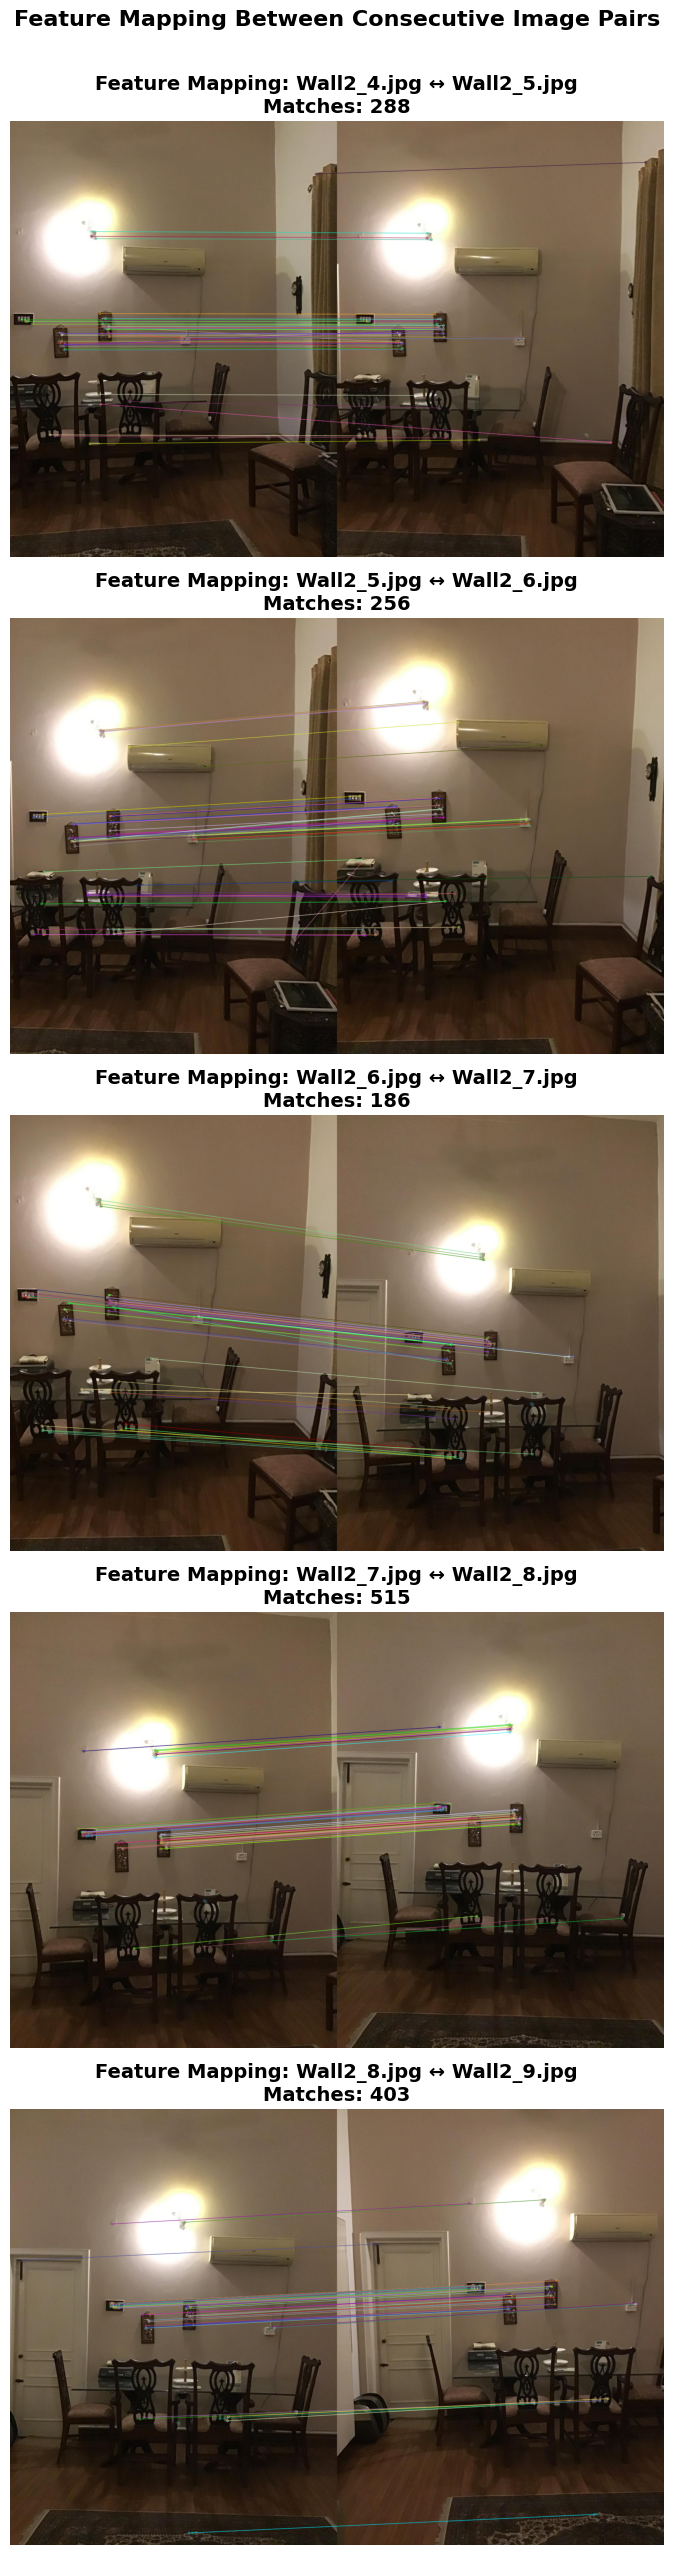


 Total matches across all consecutive pairs: 1648
 Average matches per pair: 206.0

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
FEATURE MATCHING PROGRESSION ANALYSIS
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
  Wall2_4.jpg: 2000 keypoints
  Wall2_5.jpg: 2000 keypoints
  Wall2_5.jpg: 2000 keypoints
  Wall2_6.jpg: 2000 keypoints
  Wall2_6.jpg: 2000 keypoints
  Wall2_7.jpg: 2000 keypoints
  Wall2_7.jpg: 2000 keypoints
  Wall2_8.jpg: 2000 keypoints
  Wall2_8.jpg: 2000 keypoints
  Wall2_9.jpg: 2000 keypoints
  Wall2_9.jpg: 2000 keypoints
  Wall2_10.jpg: 2000 keypoints
  Wall2_10.jpg: 2000 keypoints
  Wall2_11.jpg: 1884 keypoints
  Wall2_11.jpg: 1884 keypoints
  Wall2_12.jpg: 2000 keypoints


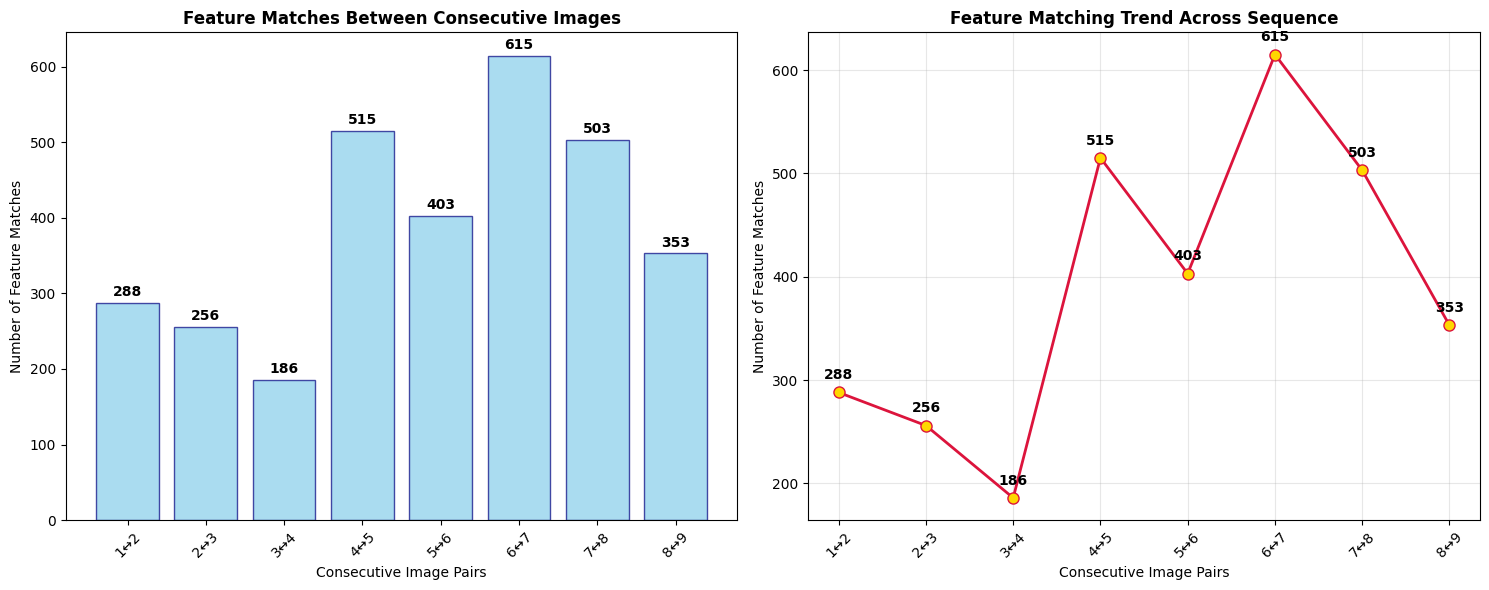


 MATCHING STATISTICS:
   Total matches across all pairs: 3119
   Average matches per pair: 389.9 ± 137.2
   Maximum matches: 615 (Pair 6)
   Minimum matches: 186 (Pair 3)

 Processing: Wall2_4.jpg ↔ Wall2_5.jpg
Feature Detection & Matching...
  Keypoints found: 2991 in img1, 2901 in img2
    Good matches after ratio test: 374
 Camera Calibration.
    Intrinsic matrix K:
[[1.152e+03 0.000e+00 4.800e+02]
 [0.000e+00 1.152e+03 6.400e+02]
 [0.000e+00 0.000e+00 1.000e+00]]
 Essential Matrix Estimation.
    Inlier matches after RANSAC: 292
 Pose Recovery.
    Rotation Matrix R recovered
    Translation Vector t: [-0.937, 0.341, 0.074]
 Triangulation.
    Total 3D points triangulated: 292
    Valid 3D points (in front of both cameras): 292

 Visualizing Two-View Reconstruction.


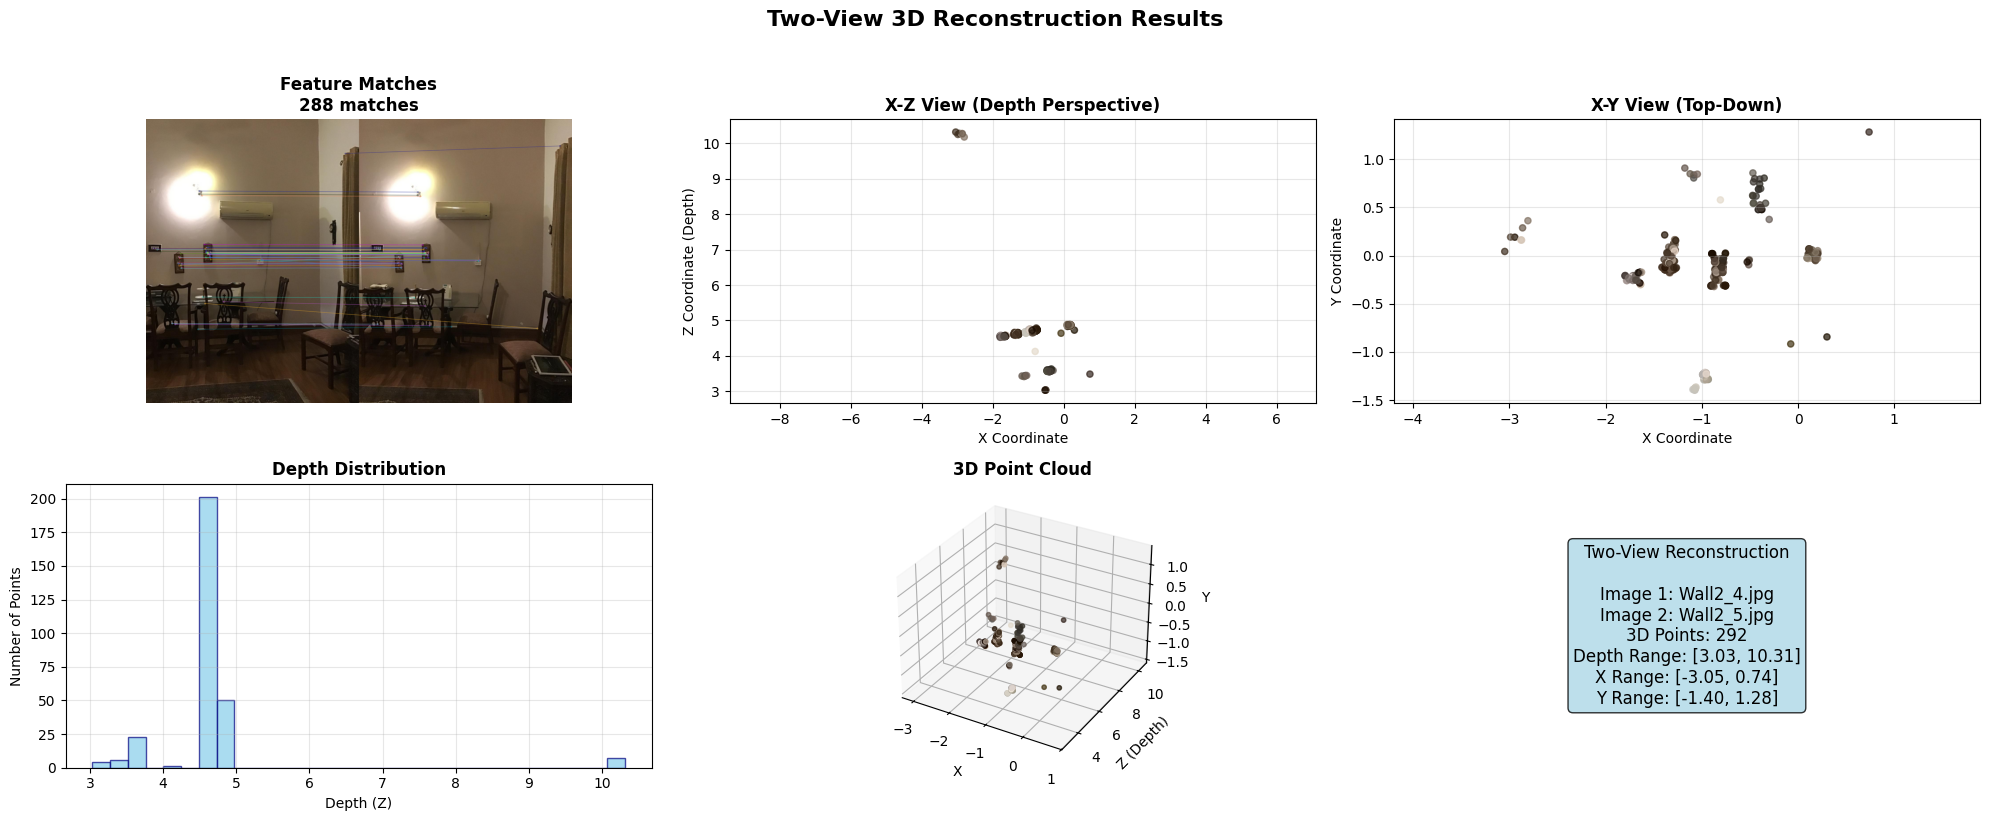

 Point cloud saved to: week2_stable_pointcloud.ply
 Point cloud saved to: /content/drive/MyDrive/week2_stable_pointcloud.ply
 3D Points: 292
 Output: week2_stable_pointcloud.ply
 Initialized: 2 cameras, 292 3D points, 584 observations

++++++++++++++++++++++++++++++++++++++++++++++++++
 Processing 3/9: Wall2_6.jpg
++++++++++++++++++++++++++++++++++++++++++++++++++
    Image 2: 1500 ORB features
    Found 308 2D-3D correspondences
    PnP Success! 157 inliers (threshold=8.0)
    Found 178 matches for triangulation
    Added 80 new 3D points with observations
    Progress: 3 cameras, 372 3D points

++++++++++++++++++++++++++++++++++++++++++++++++++
 Processing 4/9: Wall2_7.jpg
++++++++++++++++++++++++++++++++++++++++++++++++++
    Image 3: 1500 ORB features
    Found 334 2D-3D correspondences
    PnP Success! 200 inliers (threshold=8.0)
    Found 106 matches for triangulation
    Added 80 new 3D points with observations

    Running Bundle Adjustment.
    Running Bundle Adjustment.
    B

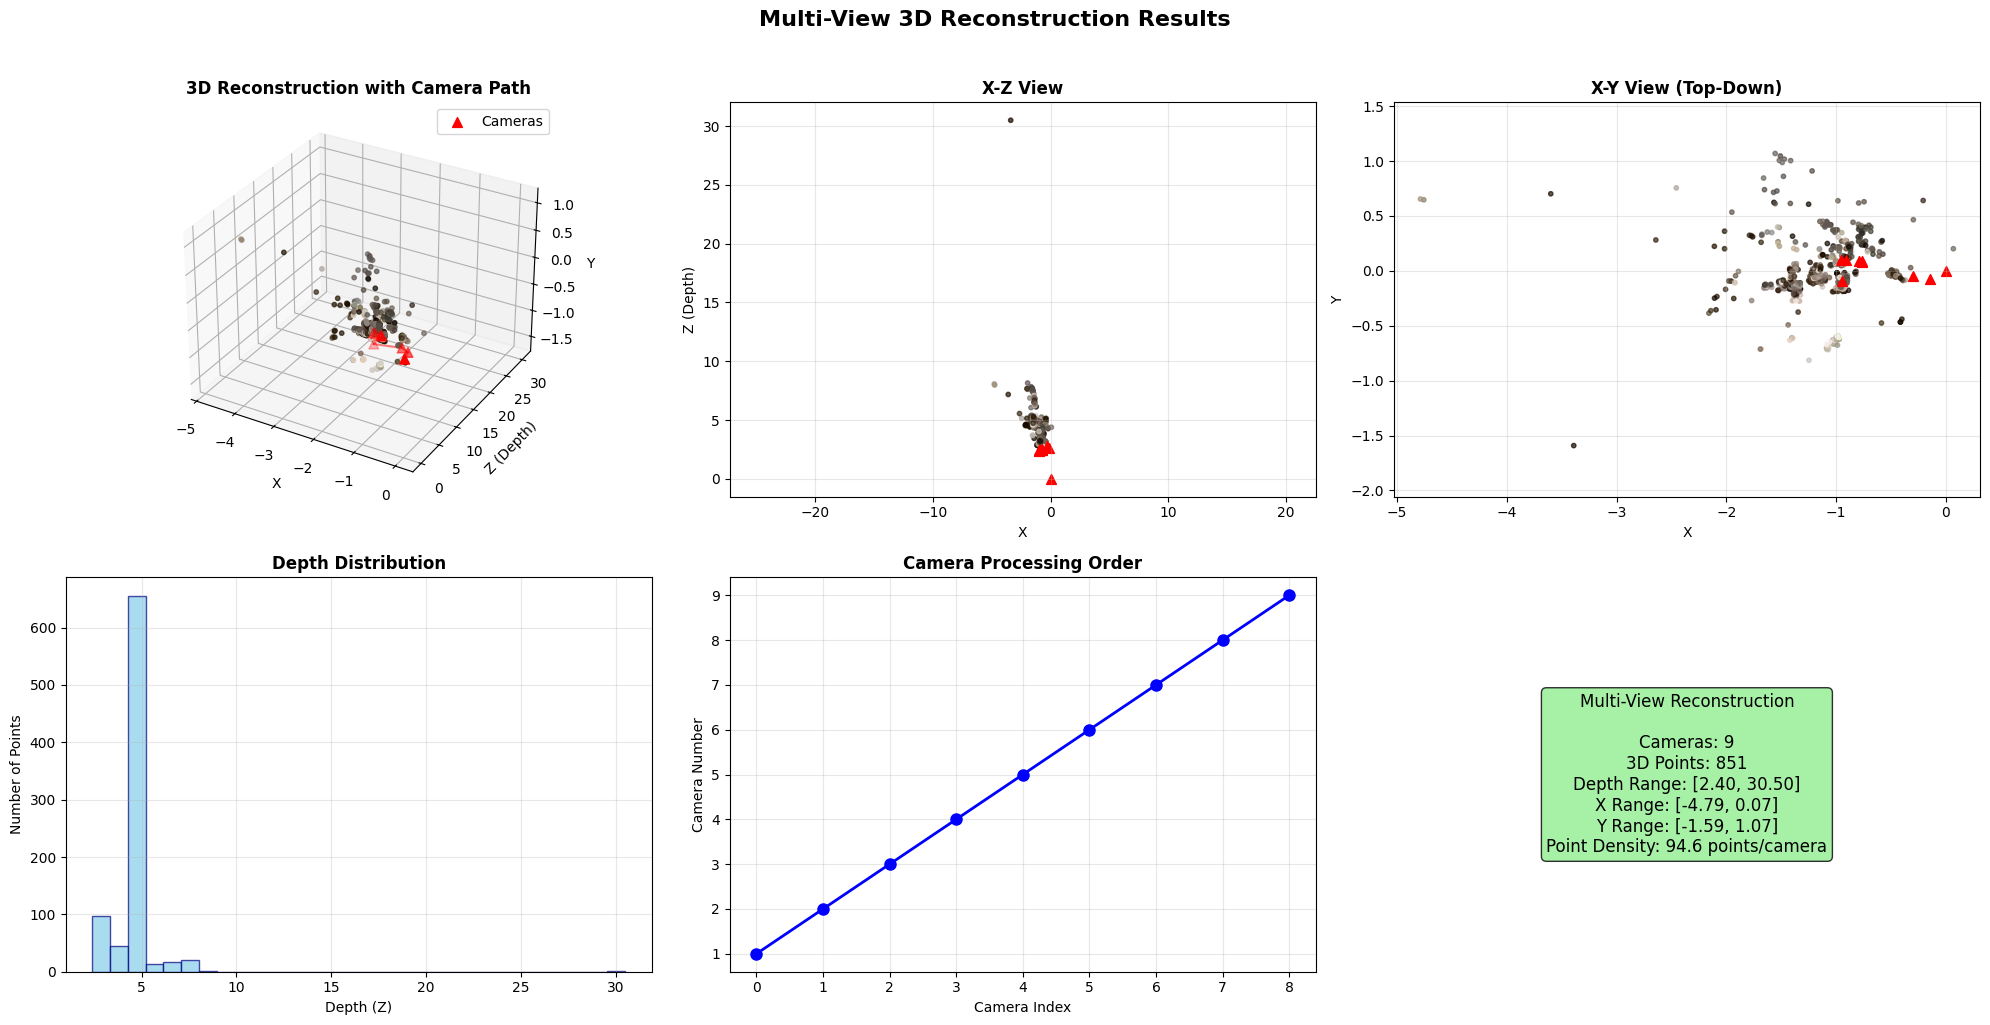


 Creating interactive 3D visualization.


 Final: 9 cameras, 851 3D points
 Point cloud saved to: week3_proper_ba_reconstruction_pointcloud.ply
 Camera poses saved to: week3_proper_ba_reconstruction_poses.json
 Files also saved to Google Drive

 COMPLETE PIPELINE WITH PROPER BA FINISHED SUCCESSFULLY!
 Final Statistics:
   • Images processed: 9
   • Cameras reconstructed: 9
   • 3D points: 851
   • Points per camera: 94.6


In [2]:
!pip install open3d plotly scipy

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import os
import open3d as o3d
from scipy.spatial.transform import Rotation as R
from scipy.optimize import least_squares
import plotly.graph_objects as go
from collections import defaultdict
import glob
import json
import shutil
import re

drive.mount('/content/drive')


def load_all_images_sequentially(folder_path):
    images = []
    filenames = []

    image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.JPG', '*.JPEG', '*.PNG']
    image_files = []

    for ext in image_extensions:
        image_pattern = os.path.join(folder_path, ext)
        image_files.extend(glob.glob(image_pattern))

    if not image_files:
        print(f"No image files found in: {folder_path}")
        return images, filenames

    def get_sort_key(filepath):
        filename = os.path.basename(filepath)
        numbers = re.findall(r'\d+', filename)
        if numbers:
            return [int(num) for num in numbers]
        return [0]

    image_files_sorted = sorted(image_files, key=get_sort_key)

    print(f" Loading {len(image_files_sorted)} images:")

    for i, filepath in enumerate(image_files_sorted, 1):
        filename = os.path.basename(filepath)
        img = cv2.imread(filepath)
        if img is not None:
            images.append(img)
            filenames.append(filename)
            print(f"  {i:2d}.  {filename} ({img.shape[1]}x{img.shape[0]})")
        else:
            print(f"  {i:2d}.  Failed to load: {filename}")

    print(f"\n Successfully loaded: {len(images)}/{len(image_files_sorted)} images")

    return images, filenames

def display_original_image_grid(images, filenames, figsize=(20, 12)):
    n = len(images)
    if n == 0:
        print("No images to display")
        return

    cols = min(5, n)
    rows = (n + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=figsize)

    if rows == 1 and cols == 1:
        axes = [axes]
    elif rows == 1:
        axes = axes
    elif cols == 1:
        axes = axes.reshape(-1)
    else:
        axes = axes.flatten()

    for i in range(rows * cols):
        if i < n:
            img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
            axes[i].imshow(img_rgb)
            axes[i].set_title(f'{i+1}. {filenames[i]}', fontsize=10, fontweight='bold')
            axes[i].axis('off')
        else:
            axes[i].axis('off')

    plt.tight_layout()
    plt.suptitle(f'All {n} Original Color Images', fontsize=16, fontweight='bold', y=1.02)
    plt.show()

def feature_mapping_between_pair(img1, img2, title1, title2):
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    orb = cv2.ORB_create(nfeatures=2000)

    kp1, des1 = orb.detectAndCompute(gray1, None)
    kp2, des2 = orb.detectAndCompute(gray2, None)

    print(f"  {title1}: {len(kp1)} keypoints")
    print(f"  {title2}: {len(kp2)} keypoints")

    if des1 is not None and des2 is not None and len(des1) > 0 and len(des2) > 0:
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
        matches = bf.knnMatch(des1, des2, k=2)

        good_matches = []
        for match_pair in matches:
            if len(match_pair) >= 2:
                m, n = match_pair[0], match_pair[1]
                if m.distance < 0.75 * n.distance:
                    good_matches.append(m)
    else:
        print("  No descriptors found!")
        return None, 0

    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches[:50], None,
                                 flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return img_matches, len(good_matches)

def visualize_consecutive_feature_mapping(images, filenames):

    print("FEATURE MAPPING BETWEEN CONSECUTIVE IMAGE PAIRS")

    n = len(images)
    if n < 2:
        print("Need at least 2 images for feature mapping")
        return 0

    if n > 6:
        print(f" Showing first 5 pairs (out of {n-1} total)")
        n_pairs_to_show = min(5, n-1)
        fig, axes = plt.subplots(n_pairs_to_show, 1, figsize=(20, 5*n_pairs_to_show))
        if n_pairs_to_show == 1:
            axes = [axes]
    else:
        n_pairs_to_show = n-1
        fig, axes = plt.subplots(n-1, 1, figsize=(20, 6*(n-1)))
        if n-1 == 1:
            axes = [axes]

    total_matches = 0

    for i in range(n_pairs_to_show):
        print(f"\nMapping {filenames[i]} ↔ {filenames[i+1]}:")

        img_matches, num_matches = feature_mapping_between_pair(
            images[i], images[i+1], filenames[i], filenames[i+1]
        )

        total_matches += num_matches

        if img_matches is not None:
            axes[i].imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
            axes[i].set_title(
                f'Feature Mapping: {filenames[i]} ↔ {filenames[i+1]}\n'
                f'Matches: {num_matches}',
                fontsize=14, fontweight='bold'
            )
            axes[i].axis('off')
        else:
            axes[i].text(0.5, 0.5, f'No matches found\n{filenames[i]} ↔ {filenames[i+1]}',
                        ha='center', va='center', transform=axes[i].transAxes, fontsize=12)
            axes[i].axis('off')

    plt.tight_layout()
    plt.suptitle('Feature Mapping Between Consecutive Image Pairs',
                 fontsize=16, fontweight='bold', y=1.02)
    plt.show()

    print(f"\n Total matches across all consecutive pairs: {total_matches}")
    if n-1 > 0:
        print(f" Average matches per pair: {total_matches/(n-1):.1f}")

    return total_matches

def create_feature_progression_analysis(images, filenames):
    print("\n" + "+"*60)
    print("FEATURE MATCHING PROGRESSION ANALYSIS")
    print("+"*60)

    n = len(images)
    if n < 2:
        print("Need at least 2 images for analysis")
        return []

    match_counts = []
    pair_labels = []

    for i in range(n-1):
        _, num_matches = feature_mapping_between_pair(images[i], images[i+1], filenames[i], filenames[i+1])
        match_counts.append(num_matches)
        pair_labels.append(f"{i+1}↔{i+2}")

    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    bars = plt.bar(range(len(match_counts)), match_counts, color='skyblue', edgecolor='navy', alpha=0.7)
    plt.xlabel('Consecutive Image Pairs')
    plt.ylabel('Number of Feature Matches')
    plt.title('Feature Matches Between Consecutive Images', fontweight='bold')
    plt.xticks(range(len(match_counts)), pair_labels, rotation=45)

    for bar, value in zip(bars, match_counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                f'{value}', ha='center', va='bottom', fontweight='bold')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(match_counts)), match_counts, 'o-', linewidth=2, markersize=8,
             color='crimson', markerfacecolor='gold', markeredgecolor='crimson')
    plt.xlabel('Consecutive Image Pairs')
    plt.ylabel('Number of Feature Matches')
    plt.title('Feature Matching Trend Across Sequence', fontweight='bold')
    plt.xticks(range(len(match_counts)), pair_labels, rotation=45)
    plt.grid(True, alpha=0.3)

    for i, value in enumerate(match_counts):
        plt.text(i, value + 10, f'{value}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    print(f"\n MATCHING STATISTICS:")
    print(f"   Total matches across all pairs: {sum(match_counts)}")
    if len(match_counts) > 0:
        print(f"   Average matches per pair: {np.mean(match_counts):.1f} ± {np.std(match_counts):.1f}")
        print(f"   Maximum matches: {max(match_counts)} (Pair {match_counts.index(max(match_counts)) + 1})")
        print(f"   Minimum matches: {min(match_counts)} (Pair {match_counts.index(min(match_counts)) + 1})")

    return match_counts

# =============================================================================
# WEEK 2
# =============================================================================

def two_view_reconstruction_stable(img1, img2, filename1, filename2):


    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    print("Feature Detection & Matching...")

    orb = cv2.ORB_create( nfeatures=3000, scaleFactor=1.2, nlevels=8, edgeThreshold=15, firstLevel=0, WTA_K=2, scoreType=cv2.ORB_HARRIS_SCORE, patchSize=31, fastThreshold=20 )

    kp1, des1 = orb.detectAndCompute(gray1, None)
    kp2, des2 = orb.detectAndCompute(gray2, None)

    print(f"  Keypoints found: {len(kp1)} in img1, {len(kp2)} in img2")

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
    matches = bf.knnMatch(des1, des2, k=2)

    good_matches = []
    for match_pair in matches:
        if len(match_pair) >= 2:
            m, n = match_pair[0], match_pair[1]
            if m.distance < 0.75 * n.distance:
                good_matches.append(m)

    print(f"    Good matches after ratio test: {len(good_matches)}")

    if len(good_matches) < 50:
        print(f" Warning: Only {len(good_matches)} good matches (should be > 100)")

    pts1 = np.float32([kp1[m.queryIdx].pt for m in good_matches])
    pts2 = np.float32([kp2[m.trainIdx].pt for m in good_matches])

    print(" Camera Calibration.")
    h, w = img1.shape[:2]

    fx = fy = w * 1.2
    cx, cy = w/2, h/2

    K = np.array([[fx, 0, cx],
                  [0, fy, cy],
                  [0, 0, 1]])

    print(f"    Intrinsic matrix K:\n{K}")
    print(" Essential Matrix Estimation.")

    E, mask = cv2.findEssentialMat(pts1, pts2, K,  method=cv2.RANSAC,   prob=0.999,   threshold=1.0,  maxIters=2000)
    pts1_inliers = pts1[mask.ravel() == 1]
    pts2_inliers = pts2[mask.ravel() == 1]

    print(f"    Inlier matches after RANSAC: {len(pts1_inliers)}")

    if len(pts1_inliers) < 8:
        print(" Too few inliers for pose recovery")
        return None, None, None, None, 0, kp1, des1, kp2, des2, K

    print(" Pose Recovery.")

    _, R_mat, t_vec, mask_pose = cv2.recoverPose(E, pts1_inliers, pts2_inliers, K)

    print(f"    Rotation Matrix R recovered")
    print(f"    Translation Vector t: [{t_vec[0,0]:.3f}, {t_vec[1,0]:.3f}, {t_vec[2,0]:.3f}]")

    print(" Triangulation.")

    P1 = np.hstack((np.eye(3), np.zeros((3, 1))))
    P2 = np.hstack((R_mat, t_vec))
    P1 = K @ P1
    P2 = K @ P2

    points_4d = cv2.triangulatePoints(P1, P2, pts1_inliers.T, pts2_inliers.T)
    points_3d = points_4d[:3] / points_4d[3]
    points_3d = points_3d.T

    points_cam2 = (R_mat @ points_3d.T + t_vec.ravel()[:, np.newaxis]).T

    valid_z1 = points_3d[:, 2] > 0
    valid_z2 = points_cam2[:, 2] > 0
    valid_mask = valid_z1 & valid_z2

    points_3d_valid = points_3d[valid_mask]
    pts1_valid = pts1_inliers[valid_mask]

    print(f"    Total 3D points triangulated: {len(points_3d)}")
    print(f"    Valid 3D points (in front of both cameras): {len(points_3d_valid)}")

    colors = []
    for i, (u, v) in enumerate(pts1_valid):
        if 0 <= int(v) < h and 0 <= int(u) < w:
            colors.append(img1[int(v), int(u)][::-1])
        else:
            colors.append([255, 255, 255])

    colors = np.array(colors) / 255.0

    valid_descriptors = []
    valid_indices = np.where(valid_mask)[0]
    for i, match_idx in enumerate(np.where(mask.ravel() == 1)[0][valid_mask]):
        if i < len(good_matches):
            valid_descriptors.append(des1[good_matches[match_idx].queryIdx])

    while len(valid_descriptors) < len(points_3d_valid):
        valid_descriptors.append(np.zeros(32, dtype=np.uint8))

    return points_3d_valid, colors, E, R_mat, t_vec, len(points_3d_valid), kp1, valid_descriptors, kp2, des2, K

def visualize_two_view_results(img1, img2, points_3d, colors, filename1, filename2):

    print("\n Visualizing Two-View Reconstruction.")

    fig = plt.figure(figsize=(20, 8))

    ax1 = fig.add_subplot(231)
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    orb = cv2.ORB_create(nfeatures=2000)
    kp1, des1 = orb.detectAndCompute(gray1, None)
    kp2, des2 = orb.detectAndCompute(gray2, None)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
    matches = bf.knnMatch(des1, des2, k=2)

    good_matches = []
    for match_pair in matches:
        if len(match_pair) >= 2:
            m, n = match_pair[0], match_pair[1]
            if m.distance < 0.75 * n.distance:
                good_matches.append(m)

    match_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches[:50], None,
                               flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    ax1.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
    ax1.set_title(f'Feature Matches\n{len(good_matches)} matches', fontweight='bold')
    ax1.axis('off')

    ax2 = fig.add_subplot(232)
    if len(points_3d) > 0:
        ax2.scatter(points_3d[:, 0], points_3d[:, 2], c=colors, s=20, alpha=0.7)
        ax2.set_xlabel('X Coordinate')
        ax2.set_ylabel('Z Coordinate (Depth)')
        ax2.set_title('X-Z View (Depth Perspective)', fontweight='bold')
        ax2.grid(True, alpha=0.3)
        ax2.axis('equal')

    ax3 = fig.add_subplot(233)
    if len(points_3d) > 0:
        ax3.scatter(points_3d[:, 0], points_3d[:, 1], c=colors, s=20, alpha=0.7)
        ax3.set_xlabel('X Coordinate')
        ax3.set_ylabel('Y Coordinate')
        ax3.set_title('X-Y View (Top-Down)', fontweight='bold')
        ax3.grid(True, alpha=0.3)
        ax3.axis('equal')

    ax4 = fig.add_subplot(234)
    if len(points_3d) > 0:
        depths = points_3d[:, 2]
        ax4.hist(depths, bins=30, color='skyblue', edgecolor='navy', alpha=0.7)
        ax4.set_xlabel('Depth (Z)')
        ax4.set_ylabel('Number of Points')
        ax4.set_title('Depth Distribution', fontweight='bold')
        ax4.grid(True, alpha=0.3)

    ax5 = fig.add_subplot(235, projection='3d')
    if len(points_3d) > 0:
        ax5.scatter(points_3d[:, 0], points_3d[:, 2], points_3d[:, 1],
                   c=colors, s=10, alpha=0.7)
        ax5.set_xlabel('X')
        ax5.set_ylabel('Z (Depth)')
        ax5.set_zlabel('Y')
        ax5.set_title('3D Point Cloud', fontweight='bold')

    ax6 = fig.add_subplot(236)
    ax6.axis('off')
    info_text = f"Two-View Reconstruction\n\n"
    info_text += f"Image 1: {filename1}\n"
    info_text += f"Image 2: {filename2}\n"
    info_text += f"3D Points: {len(points_3d)}\n"
    if len(points_3d) > 0:
        info_text += f"Depth Range: [{points_3d[:,2].min():.2f}, {points_3d[:,2].max():.2f}]\n"
        info_text += f"X Range: [{points_3d[:,0].min():.2f}, {points_3d[:,0].max():.2f}]\n"
        info_text += f"Y Range: [{points_3d[:,1].min():.2f}, {points_3d[:,1].max():.2f}]"

    ax6.text(0.5, 0.5, info_text, ha='center', va='center',
             transform=ax6.transAxes, fontsize=12,
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

    plt.suptitle(f'Two-View 3D Reconstruction Results', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

def save_point_cloud_ply(points, colors, filename):

    if len(points) == 0:
        print("No points to save")
        return False

    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(points)

    if colors.shape[1] == 3 and colors.max() <= 1.0:
        pcd.colors = o3d.utility.Vector3dVector(colors)
    else:
        colors_normalized = colors / 255.0 if colors.max() > 1.0 else colors
        pcd.colors = o3d.utility.Vector3dVector(colors_normalized)

    o3d.io.write_point_cloud(filename, pcd)
    print(f" Point cloud saved to: {filename}")
    return True

def run_week2_stable(images, filenames):

    if len(images) < 2:
        print("Need at least 2 images for two-view reconstruction")
        return None

    img1, img2 = images[0], images[1]
    filename1, filename2 = filenames[0], filenames[1]

    print(f"\n Processing: {filename1} ↔ {filename2}")
    results = two_view_reconstruction_stable(img1, img2, filename1, filename2)

    if results[0] is None:
        print(" Reconstruction failed")
        return None
    points_3d, colors, E, R_mat, t_vec, num_points, kp1, des1, kp2, des2, K = results

    if num_points < 50:
        print(f" Warning: Only {num_points} points reconstructed (should be > 100)")

    visualize_two_view_results(img1, img2, points_3d, colors, filename1, filename2)
    save_point_cloud_ply(points_3d, colors, "week2_stable_pointcloud.ply")

    try:
        save_point_cloud_ply(points_3d, colors, "/content/drive/MyDrive/week2_stable_pointcloud.ply")
    except:
        pass

    print(f" 3D Points: {num_points}")
    print(f" Output: week2_stable_pointcloud.ply")

    return {
        'points_3d': points_3d,
        'colors': colors,
        'E': E,
        'R_mat': R_mat,
        't_vec': t_vec,
        'num_points': num_points,
        'K': K,
        'kp1': kp1,
        'des1': des1,
        'kp2': kp2,
        'des2': des2,
        'img1': img1,
        'img2': img2
    }

# =============================================================================
# WEEK 3:
# =============================================================================

class StableMultiViewSfM:

    def __init__(self, K):
        self.cameras = []
        self.points_3d = []
        self.point_colors = []
        self.point_descriptors = []
        self.image_features = {}
        self.K = K
        self.point_to_observations = defaultdict(list)
        self.point_observations = {}

    def initialize_from_two_view(self, points_3d, colors, R, t, img1, img2, kp1, des1, kp2, des2):

        self.cameras.append({
            'R': np.eye(3),
            't': np.zeros((3, 1)),
            'image_idx': 0
        })

        self.cameras.append({
            'R': R,
            't': t,
            'image_idx': 1
        })

        self.points_3d = points_3d.tolist()
        self.point_colors = colors.tolist()

        self.image_features[0] = {'kp': kp1, 'des': des1, 'image': img1}
        self.image_features[1] = {'kp': kp2, 'des': des2, 'image': img2}

        self.point_descriptors = []
        for i in range(len(points_3d)):
            if i < len(des1):
                self.point_descriptors.append(des1[i])
            else:
                self.point_descriptors.append(np.zeros(32, dtype=np.uint8))

        for i in range(len(points_3d)):
            self.point_to_observations[i].append(0)
            self.point_to_observations[i].append(1)

        for point_idx in range(len(points_3d)):
            point_3d = np.array(points_3d[point_idx])

            for cam_idx in [0, 1]:
                if cam_idx < len(self.cameras):
                    cam = self.cameras[cam_idx]
                    R_mat = np.array(cam['R'])
                    t_vec = np.array(cam['t'])

                    point_cam = R_mat @ point_3d + t_vec.flatten()
                    if point_cam[2] > 0:
                        point_proj = self.K @ point_cam
                        u = point_proj[0] / point_proj[2]
                        v = point_proj[1] / point_proj[2]

                        if point_idx not in self.point_observations:
                            self.point_observations[point_idx] = {}
                        self.point_observations[point_idx][cam_idx] = (float(u), float(v))

        print(f" Initialized: {len(self.cameras)} cameras, {len(self.points_3d)} 3D points, {sum(len(obs) for obs in self.point_observations.values())} observations")
        return True

    def extract_features(self, image, image_idx, max_features=2000):

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        orb = cv2.ORB_create( nfeatures=max_features, scaleFactor=1.2, nlevels=8, edgeThreshold=15, firstLevel=0, WTA_K=2, scoreType=cv2.ORB_HARRIS_SCORE, patchSize=31, fastThreshold=20  )

        kp, des = orb.detectAndCompute(gray, None)

        self.image_features[image_idx] = {
            'kp': kp,
            'des': des,
            'image': image
        }

        print(f"    Image {image_idx}: {len(kp)} ORB features")
        return kp, des

    def find_2d_3d_correspondences(self, image_idx, min_matches=15):

        if image_idx not in self.image_features:
            return [], [], []

        kp_new = self.image_features[image_idx]['kp']
        des_new = self.image_features[image_idx]['des']

        if des_new is None or len(self.point_descriptors) == 0:
            return [], [], []

        existing_des = np.array(self.point_descriptors, dtype=np.uint8)
        FLANN_INDEX_LSH = 6
        index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
        search_params = dict(checks=50)
        flann = cv2.FlannBasedMatcher(index_params, search_params)

        try:
            matches = flann.knnMatch(des_new, existing_des, k=2)
        except:
            bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
            matches = bf.knnMatch(des_new, existing_des, k=2)

        good_matches = []
        for match_pair in matches:
            if len(match_pair) >= 2:
                m, n = match_pair[0], match_pair[1]
                if m.distance < 0.8 * n.distance:
                    good_matches.append(m)

        if len(good_matches) < min_matches:
            print(f"    Only {len(good_matches)} matches found (need {min_matches})")
            return [], [], []

        points_2d = []
        points_3d = []
        point_indices = []

        for match in good_matches:
            point_idx = match.trainIdx
            if point_idx < len(self.points_3d):
                points_2d.append(kp_new[match.queryIdx].pt)
                points_3d.append(self.points_3d[point_idx])
                point_indices.append(point_idx)

        print(f"    Found {len(points_2d)} 2D-3D correspondences")
        return (np.array(points_2d, dtype=np.float32),
                np.array(points_3d, dtype=np.float32),
                point_indices)

    def estimate_camera_pose(self, image_idx):

        points_2d, points_3d, point_indices = self.find_2d_3d_correspondences(image_idx, min_matches=15)

        if len(points_2d) < 15:
            print(f"    Too few correspondences: {len(points_2d)}")
            return self.initialize_camera_from_previous(image_idx)

        for ransac_threshold in [8.0, 4.0, 2.0]:
            try:
                success, rvec, tvec, inliers = cv2.solvePnPRansac(
                    points_3d,
                    points_2d,
                    self.K,
                    None,
                    flags=cv2.SOLVEPNP_ITERATIVE,
                    confidence=0.99,
                    reprojectionError=ransac_threshold,
                    iterationsCount=1000
                )

                if success and inliers is not None and len(inliers) >= 8:
                    print(f"    PnP Success! {len(inliers)} inliers (threshold={ransac_threshold})")
                    R_mat, _ = cv2.Rodrigues(rvec)

                    self.cameras.append({
                        'R': R_mat,
                        't': tvec,
                        'image_idx': image_idx
                    })

                    for inlier_idx in inliers.flatten():
                        point_idx = point_indices[inlier_idx]
                        self.point_to_observations[point_idx].append(len(self.cameras) - 1)

                    return True

            except Exception as e:
                continue

        print(f"     PnP failed - using initialization from previous camera")
        return self.initialize_camera_from_previous(image_idx)

    def initialize_camera_from_previous(self, image_idx):

        if len(self.cameras) == 0:
            return False

        last_cam = self.cameras[-1]
        if len(self.cameras) < 5:
            delta_t = np.array([[0.3], [0.0], [0.0]])
        else:
            delta_t = np.array([[0.2], [0.0], [0.0]])

        new_t = last_cam['t'] + last_cam['R'] @ delta_t

        self.cameras.append({
            'R': last_cam['R'].copy(),
            't': new_t,
            'image_idx': image_idx
        })

        return True

    def triangulate_new_points_with_observations(self, image_idx, max_new_points=100):

        if len(self.cameras) < 2:
            return 0

        curr_cam_idx = len(self.cameras) - 1
        prev_cam_idx = curr_cam_idx - 1

        if image_idx not in self.image_features or prev_cam_idx >= image_idx:
            return 0

        curr_features = self.image_features[image_idx]
        prev_features = self.image_features[prev_cam_idx]

        if curr_features['des'] is None or prev_features['des'] is None:
            return 0

        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
        matches = bf.knnMatch(prev_features['des'], curr_features['des'], k=2)

        good_matches = []
        for match_pair in matches:
            if len(match_pair) >= 2:
                m, n = match_pair[0], match_pair[1]
                if m.distance < 0.7 * n.distance:
                    good_matches.append(m)

        if len(good_matches) < 20:
            print(f"    Only {len(good_matches)} matches for triangulation")
            return 0

        print(f"    Found {len(good_matches)} matches for triangulation")

        pts1 = np.float32([prev_features['kp'][m.queryIdx].pt for m in good_matches])
        pts2 = np.float32([curr_features['kp'][m.trainIdx].pt for m in good_matches])

        prev_cam = self.cameras[prev_cam_idx]
        curr_cam = self.cameras[curr_cam_idx]

        P1 = self.K @ np.hstack((prev_cam['R'], prev_cam['t']))
        P2 = self.K @ np.hstack((curr_cam['R'], curr_cam['t']))

        points_4d = cv2.triangulatePoints(P1, P2, pts1.T, pts2.T)
        points_3d = points_4d[:3] / points_4d[3]
        points_3d = points_3d.T

        new_points_added = 0
        for i, point_3d in enumerate(points_3d):
            if new_points_added >= max_new_points:
                break

            if self.is_valid_point(point_3d):
                point_idx = len(self.points_3d)
                self.points_3d.append(point_3d.tolist())
                u, v = int(pts1[i][0]), int(pts1[i][1])
                prev_image = prev_features['image']
                h, w = prev_image.shape[:2]

                if 0 <= u < w and 0 <= v < h:
                    color = prev_image[v, u][::-1]
                    self.point_colors.append([c/255.0 for c in color])
                else:
                    self.point_colors.append([0.5, 0.5, 0.5])

                self.point_descriptors.append(prev_features['des'][good_matches[i].queryIdx])

                if point_idx not in self.point_observations:
                    self.point_observations[point_idx] = {}

                self.point_observations[point_idx][prev_cam_idx] = (float(pts1[i][0]), float(pts1[i][1]))
                self.point_observations[point_idx][curr_cam_idx] = (float(pts2[i][0]), float(pts2[i][1]))
                self.point_to_observations[point_idx].append(prev_cam_idx)
                self.point_to_observations[point_idx].append(curr_cam_idx)

                new_points_added += 1

        print(f"    Added {new_points_added} new 3D points with observations")
        return new_points_added

    def is_valid_point(self, point):

        if np.any(np.isnan(point)) or np.any(np.isinf(point)):
            return False

        depth = np.linalg.norm(point)
        if depth < 0.5 or depth > 20.0:
            return False
        if abs(point[0]) > 10 or abs(point[1]) > 10 or point[2] > 10:
            return False

        return True

    def run_bundle_adjustment_proper(self):

        print("    Running Bundle Adjustment.")

        if len(self.cameras) < 2 or len(self.points_3d) < 50:
            print(f"     Too few cameras or points for BA")
            return None, None

        n_cameras = len(self.cameras)
        n_points = len(self.points_3d)

        print(f"    BA Setup: {n_cameras} cameras, {n_points} points")

        total_observations = sum(len(obs) for obs in self.point_observations.values())
        print(f"    Total observations: {total_observations}")

        if total_observations < 200:
            print(f"     Too few observations ({total_observations}) - skipping BA")
            return None, None

        params = []

        for i, cam in enumerate(self.cameras):
            if i == 0:
                params.extend([0.0, 0.0, 0.0])
                params.extend([0.0, 0.0, 0.0])
            else:
                rvec, _ = cv2.Rodrigues(cam['R'])
                params.extend(rvec.flatten().tolist())
                params.extend(cam['t'].flatten().tolist())

        for point in self.points_3d:
            params.extend(point)

        params = np.array(params, dtype=np.float64)

        print(f"    Optimizing {len(params)} parameters.")

        def reprojection_error(params):
            camera_params = params[:n_cameras * 6].reshape((n_cameras, 6))
            point_params = params[n_cameras * 6:].reshape((n_points, 3))

            errors = []

            for point_idx, cam_observations in self.point_observations.items():
                if point_idx >= n_points:
                    continue

                point_3d = point_params[point_idx]

                for cam_idx, (obs_u, obs_v) in cam_observations.items():
                    if cam_idx >= n_cameras:
                        continue

                    rvec = camera_params[cam_idx, :3]
                    tvec = camera_params[cam_idx, 3:6]

                    try:
                        R_mat, _ = cv2.Rodrigues(rvec)

                        point_cam = R_mat @ point_3d + tvec

                        if point_cam[2] <= 0.01:
                            errors.extend([100.0, 100.0])
                            continue

                        point_proj = self.K @ point_cam
                        proj_u = point_proj[0] / point_proj[2]
                        proj_v = point_proj[1] / point_proj[2]

                        error_u = proj_u - obs_u
                        error_v = proj_v - obs_v

                        errors.extend([error_u, error_v])

                    except Exception as e:
                        errors.extend([100.0, 100.0])

            return np.array(errors, dtype=np.float64)

        initial_errors = reprojection_error(params)
        initial_rmse = np.sqrt(np.mean(initial_errors**2))
        print(f"    Initial reprojection error: {initial_rmse:.2f} pixels")

        try:
            result = least_squares(
                reprojection_error,
                params,
                method='trf',
                max_nfev=30,
                ftol=1e-5,
                xtol=1e-5,
                gtol=1e-5,
                verbose=0
            )

            final_errors = reprojection_error(result.x)
            final_rmse = np.sqrt(np.mean(final_errors**2))
            improvement = ((initial_rmse - final_rmse) / initial_rmse) * 100 if initial_rmse > 0 else 0

            print(f"    BA converged after {result.nfev} iterations")
            print(f"    Final reprojection error: {final_rmse:.2f} pixels")
            print(f"    Improvement: {improvement:.1f}%")

            camera_params_opt = result.x[:n_cameras * 6].reshape((n_cameras, 6))
            point_params_opt = result.x[n_cameras * 6:].reshape((n_points, 3))

            for i in range(1, n_cameras):
                rvec = camera_params_opt[i, :3]
                tvec = camera_params_opt[i, 3:6].reshape(3, 1)
                R_mat, _ = cv2.Rodrigues(rvec)
                self.cameras[i]['R'] = R_mat
                self.cameras[i]['t'] = tvec

            for i in range(n_points):
                self.points_3d[i] = point_params_opt[i].tolist()

            self.clean_points_after_ba()

            return final_rmse, improvement

        except Exception as e:
            print(f"    BA optimization failed: {e}")
            print("     Keeping original parameters")
            return None, None

    def clean_points_after_ba(self):

        valid_points = []
        valid_colors = []
        valid_descriptors = []
        valid_observations = {}

        for i, point in enumerate(self.points_3d):
            if (point is not None and
                not np.any(np.isnan(point)) and
                not np.any(np.isinf(point)) and
                abs(point[0]) < 50.0 and
                abs(point[1]) < 50.0 and
                point[2] > 0.1 and point[2] < 50.0):

                valid_points.append(point)
                if i < len(self.point_colors):
                    valid_colors.append(self.point_colors[i])
                if i < len(self.point_descriptors):
                    valid_descriptors.append(self.point_descriptors[i])
                if i in self.point_observations:
                    valid_observations[len(valid_points)-1] = self.point_observations[i]

        if len(valid_points) < len(self.points_3d):
            print(f"    Removed {len(self.points_3d) - len(valid_points)} invalid points after BA")
            self.points_3d = valid_points
            self.point_colors = valid_colors
            self.point_descriptors = valid_descriptors
            self.point_observations = valid_observations

            self.point_to_observations = defaultdict(list)
            for point_idx, cam_observations in self.point_observations.items():
                for cam_idx in cam_observations.keys():
                    self.point_to_observations[point_idx].append(cam_idx)

    def visualize_reconstruction(self):

        if len(self.points_3d) == 0:
            print("No points to visualize")
            return

        points_array = np.array(self.points_3d)
        colors_array = np.array(self.point_colors)

        fig = plt.figure(figsize=(20, 10))

        ax1 = fig.add_subplot(231, projection='3d')
        ax1.scatter(points_array[:, 0], points_array[:, 2], points_array[:, 1],
                   c=colors_array, s=10, alpha=0.7)

        if len(self.cameras) > 0:
            cam_positions = []
            for cam in self.cameras:
                R = np.array(cam['R'])
                t = np.array(cam['t'])
                position = (-R.T @ t).flatten()
                cam_positions.append(position)

            cam_positions = np.array(cam_positions)
            ax1.scatter(cam_positions[:, 0], cam_positions[:, 2], cam_positions[:, 1],
                       c='red', s=50, marker='^', label='Cameras')

            for i in range(len(cam_positions)-1):
                ax1.plot([cam_positions[i, 0], cam_positions[i+1, 0]],
                        [cam_positions[i, 2], cam_positions[i+1, 2]],
                        [cam_positions[i, 1], cam_positions[i+1, 1]],
                        'r-', alpha=0.5)

        ax1.set_xlabel('X')
        ax1.set_ylabel('Z (Depth)')
        ax1.set_zlabel('Y')
        ax1.set_title('3D Reconstruction with Camera Path', fontweight='bold')
        ax1.legend()

        ax2 = fig.add_subplot(232)
        ax2.scatter(points_array[:, 0], points_array[:, 2],
                   c=colors_array, s=10, alpha=0.7)
        if len(self.cameras) > 0:
            ax2.scatter(cam_positions[:, 0], cam_positions[:, 2],
                       c='red', s=50, marker='^')
        ax2.set_xlabel('X')
        ax2.set_ylabel('Z (Depth)')
        ax2.set_title('X-Z View', fontweight='bold')
        ax2.grid(True, alpha=0.3)
        ax2.axis('equal')

        ax3 = fig.add_subplot(233)
        ax3.scatter(points_array[:, 0], points_array[:, 1],
                   c=colors_array, s=10, alpha=0.7)
        if len(self.cameras) > 0:
            ax3.scatter(cam_positions[:, 0], cam_positions[:, 1],
                       c='red', s=50, marker='^')
        ax3.set_xlabel('X')
        ax3.set_ylabel('Y')
        ax3.set_title('X-Y View (Top-Down)', fontweight='bold')
        ax3.grid(True, alpha=0.3)
        ax3.axis('equal')

        ax4 = fig.add_subplot(234)
        depths = points_array[:, 2]
        ax4.hist(depths, bins=30, color='skyblue', edgecolor='navy', alpha=0.7)
        ax4.set_xlabel('Depth (Z)')
        ax4.set_ylabel('Number of Points')
        ax4.set_title('Depth Distribution', fontweight='bold')
        ax4.grid(True, alpha=0.3)

        ax5 = fig.add_subplot(235)
        camera_indices = list(range(len(self.cameras)))
        ax5.plot(camera_indices, [i+1 for i in camera_indices], 'bo-', linewidth=2, markersize=8)
        ax5.set_xlabel('Camera Index')
        ax5.set_ylabel('Camera Number')
        ax5.set_title('Camera Processing Order', fontweight='bold')
        ax5.grid(True, alpha=0.3)

        ax6 = fig.add_subplot(236)
        ax6.axis('off')
        info_text = f"Multi-View Reconstruction\n\n"
        info_text += f"Cameras: {len(self.cameras)}\n"
        info_text += f"3D Points: {len(self.points_3d)}\n"
        if len(self.points_3d) > 0:
            info_text += f"Depth Range: [{depths.min():.2f}, {depths.max():.2f}]\n"
            info_text += f"X Range: [{points_array[:,0].min():.2f}, {points_array[:,0].max():.2f}]\n"
            info_text += f"Y Range: [{points_array[:,1].min():.2f}, {points_array[:,1].max():.2f}]\n"
            info_text += f"Point Density: {len(self.points_3d)/len(self.cameras):.1f} points/camera"

        ax6.text(0.5, 0.5, info_text, ha='center', va='center',
                 transform=ax6.transAxes, fontsize=12,
                 bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

        plt.suptitle(f'Multi-View 3D Reconstruction Results', fontsize=16, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.show()

        if len(points_array) > 0:
            print("\n Creating interactive 3D visualization.")
            fig = go.Figure(data=[go.Scatter3d(
                x=points_array[:, 0],
                y=points_array[:, 2],
                z=points_array[:, 1],
                mode='markers',
                marker=dict(
                    size=3,
                    color=[f'rgb({int(c[0]*255)},{int(c[1]*255)},{int(c[2]*255)})'
                          for c in colors_array],
                    opacity=0.8
                ),
                name='3D Points'
            )])

            if len(self.cameras) > 0:
                fig.add_trace(go.Scatter3d(
                    x=cam_positions[:, 0],
                    y=cam_positions[:, 2],
                    z=cam_positions[:, 1],
                    mode='markers+lines',
                    marker=dict(size=8, color='red'),
                    line=dict(color='red', width=2),
                    name='Camera Path'
                ))

            fig.update_layout(
                title="Interactive 3D Reconstruction",
                scene=dict(
                    xaxis_title='X',
                    yaxis_title='Z (Depth)',
                    zaxis_title='Y',
                    aspectmode='data'
                ),
                width=800,
                height=600
            )

            fig.show()

    def run_pipeline_with_ba(self, images, filenames):

        total_images = len(images)
        ba_results = []

        for i in range(2, total_images):
            print(f"\n{'+'*50}")
            print(f" Processing {i+1}/{total_images}: {filenames[i]}")
            print(f"{'+'*50}")

            self.extract_features(images[i], i, max_features=1500)

            pose_success = self.estimate_camera_pose(i)

            if pose_success:
                new_points = self.triangulate_new_points_with_observations(i, max_new_points=80)

                if i % 3 == 0 and len(self.points_3d) > 100:
                    print("\n    Running Bundle Adjustment.")
                    rmse, improvement = self.run_bundle_adjustment_proper()
                    if rmse is not None:
                        ba_results.append((i, rmse, improvement))

            print(f"    Progress: {len(self.cameras)} cameras, {len(self.points_3d)} 3D points")

        if len(self.points_3d) > 50:
            print("\n Running Bundle Adjustment..")
            rmse, improvement = self.run_bundle_adjustment_proper()
            if rmse is not None:
                ba_results.append(("final", rmse, improvement))

        if ba_results:
            print("\n" + "+"*70)
            print(" BUNDLE ADJUSTMENT SUMMARY")
            print("+"*70)
            for step, rmse, imp in ba_results:
                print(f"   Step {step}: RMSE = {rmse:.2f} pixels, Improvement = {imp:.1f}%")

        self.visualize_reconstruction()

        print(f" Final: {len(self.cameras)} cameras, {len(self.points_3d)} 3D points")

        return True

    def save_results(self, base_filename="week3_proper_ba_reconstruction"):

        if len(self.points_3d) == 0:
            print("No points to save")
            return False

        points_array = np.array(self.points_3d)
        colors_array = np.array(self.point_colors)

        pcd = o3d.geometry.PointCloud()
        pcd.points = o3d.utility.Vector3dVector(points_array)
        pcd.colors = o3d.utility.Vector3dVector(colors_array)

        ply_filename = f"{base_filename}_pointcloud.ply"
        o3d.io.write_point_cloud(ply_filename, pcd)
        print(f" Point cloud saved to: {ply_filename}")
        camera_data = {
            'num_cameras': len(self.cameras),
            'camera_intrinsics': self.K.tolist(),
            'poses': []
        }

        for i, cam in enumerate(self.cameras):
            R = np.array(cam['R'])
            t = np.array(cam['t'])
            position = (-R.T @ t).flatten()

            camera_pose = {
                'camera_id': i,
                'image_index': int(cam['image_idx']),
                'rotation_matrix': R.tolist(),
                'translation_vector': t.flatten().tolist(),
                'camera_position': position.tolist()
            }

            camera_data['poses'].append(camera_pose)

        json_filename = f"{base_filename}_poses.json"
        with open(json_filename, 'w') as f:
            json.dump(camera_data, f, indent=2)

        print(f" Camera poses saved to: {json_filename}")

        try:
            drive_ply = f"/content/drive/MyDrive/{ply_filename}"
            o3d.io.write_point_cloud(drive_ply, pcd)

            drive_json = f"/content/drive/MyDrive/{json_filename}"
            with open(drive_json, 'w') as f:
                json.dump(camera_data, f, indent=2)

            print(f" Files also saved to Google Drive")
        except:
            pass

        return True

def run_week3_with_proper_ba(images, filenames, week2_results):


    if len(images) < 3:
        print(" Need at least 3 images for multi-view reconstruction")
        return None

    sfm = StableMultiViewSfM(week2_results['K'])

    sfm.initialize_from_two_view(
        week2_results['points_3d'],
        week2_results['colors'],
        week2_results['R_mat'],
        week2_results['t_vec'],
        week2_results['img1'],
        week2_results['img2'],
        week2_results['kp1'],
        week2_results['des1'],
        week2_results['kp2'],
        week2_results['des2']
    )

    sfm.run_pipeline_with_ba(images, filenames)

    sfm.save_results("week3_proper_ba_reconstruction")
    return sfm

# =============================================================================
# MAIN FUNCTION
# =============================================================================

def run_complete_pipeline_with_ba(folder_name="Wall1"):

    base_path = f'/content/drive/MyDrive/CV_project/{folder_name}'

    if not os.path.exists(base_path):
        print(f" Folder not found: {base_path}")
        print(f"   Please check if the folder exists in your Google Drive")
        return None

    print("\n Loading images.")
    images, filenames = load_all_images_sequentially(base_path)

    if len(images) < 2:
        print(" Need at least 2 images")
        return None

    print(f" Loaded {len(images)} images successfully")

    display_original_image_grid(images, filenames)
    total_matches = visualize_consecutive_feature_mapping(images, filenames)
    match_counts = create_feature_progression_analysis(images, filenames)

    if total_matches > 0 and np.mean(match_counts) < 50:
        print(f"  Warning: Low average matches ({np.mean(match_counts):.1f}) - scene may have poor texture")


    week2_results = run_week2_stable(images, filenames)

    if week2_results is None:
        print(" Week 2 failed, cannot continue to Week 3")
        return None

    if week2_results['num_points'] < 100:
        print(f"  Warning: Low point count ({week2_results['num_points']}) - reconstruction may be poor")

    if len(images) >= 3:

        week3_results = run_week3_with_proper_ba(images, filenames, week2_results)

        if week3_results:
            print(f"\n COMPLETE PIPELINE WITH PROPER BA FINISHED SUCCESSFULLY!")
            print(f" Final Statistics:")
            print(f"   • Images processed: {len(images)}")
            print(f"   • Cameras reconstructed: {len(week3_results.cameras)}")
            print(f"   • 3D points: {len(week3_results.points_3d)}")
            print(f"   • Points per camera: {len(week3_results.points_3d)/len(week3_results.cameras):.1f}")

            return week3_results
        else:
            print(" Week 3 pipeline failed")
            return None
    else:
        print("\n  Skipping Week 3: Need at least 3 images for multi-view reconstruction")
        return week2_results


# =============================================================================
# EXECUTION
# =============================================================================

if __name__ == "__main__":

    results = run_complete_pipeline_with_ba(folder_name="Wall2")

